In [1]:
import numpy as np
import pandas as pd
from numpy.random import randn

from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
dataset = randn(25)

(0, 1)

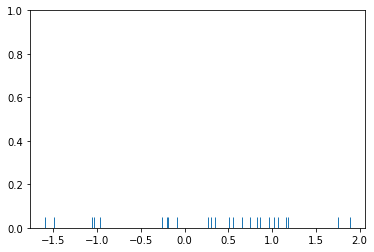

In [5]:
sns.rugplot(dataset)
plt.ylim(0,1)

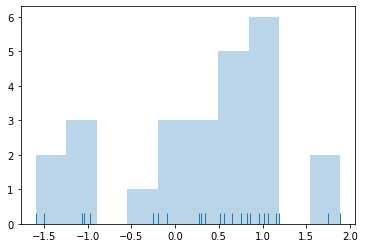

In [6]:
plt.hist(dataset, alpha=0.3)
sns.rugplot(dataset)

(0, 1)

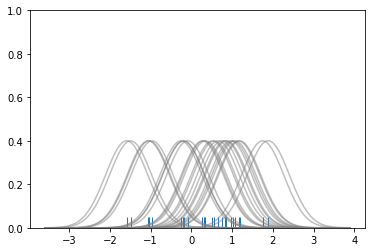

In [11]:
sns.rugplot(dataset)
x_min = dataset.min() - 2
x_max = dataset.max() + 2

x_axis = np.linspace(x_min, x_max, 100)

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**0.2

kernel_list = []

for data_point in dataset:
    kernel = stats.norm(data_point, bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    kernel = kernel/kernel.max()
    kernel = kernel * 0.4
    plt.plot(x_axis, kernel, color='grey', alpha=0.5)
    
    
plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the basis functions')

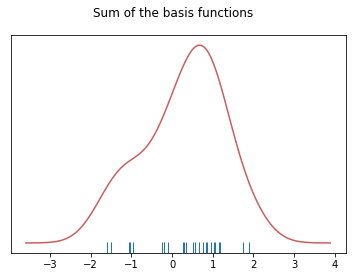

In [12]:
sum_of_kde = np.sum(kernel_list, axis=0)

fig =plt.plot(x_axis, sum_of_kde, color='indianred')
sns.rugplot(dataset)
plt.yticks([])
plt.suptitle("Sum of the basis functions")

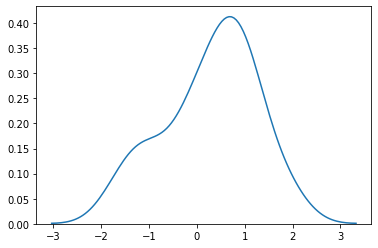

In [13]:
sns.kdeplot(dataset)

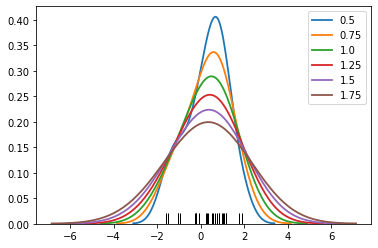

In [15]:
sns.rugplot(dataset, color='black')

for bw in np.arange(0.5,2,0.25):
    sns.kdeplot(dataset, bw=bw, lw=1.8, label=bw)

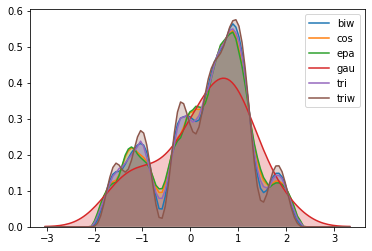

In [18]:
kernel_options = ['biw', 'cos', 'epa', 'gau', 'tri', 'triw']
for kern in kernel_options:
    sns.kdeplot(dataset, kernel=kern, label=kern, shade=True)

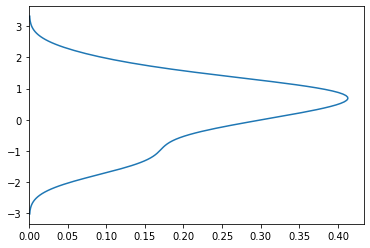

In [19]:
sns.kdeplot(dataset, vertical=True)

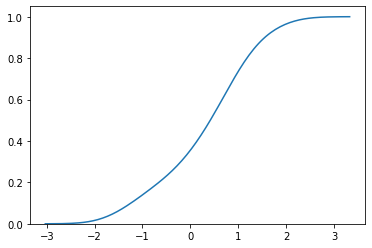

In [20]:
sns.kdeplot(dataset, cumulative=True)

C:\Users\michael.manna\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


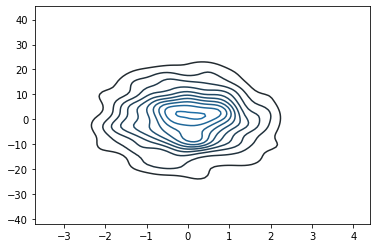

In [22]:
mean = [0,0]
cov = [[1,0], [0,100]]
dataset2 = np.random.multivariate_normal(mean, cov, 1000)

dframe = pd.DataFrame(dataset2, columns=['X', 'Y'])
sns.kdeplot(dframe)

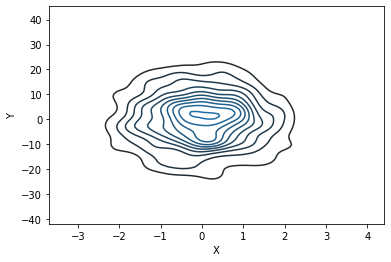

In [23]:
sns.kdeplot(dframe.X, dframe.Y)

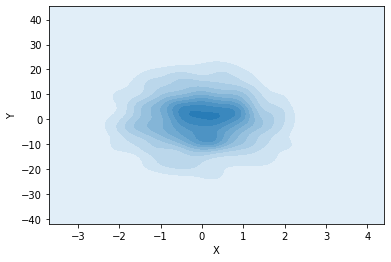

In [24]:
sns.kdeplot(dframe.X, dframe.Y, shade=True)

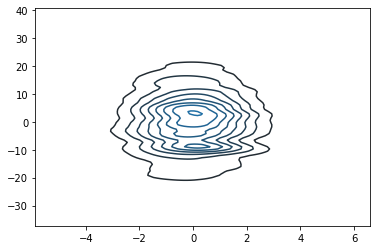

In [25]:
sns.kdeplot(dframe, bw=1)

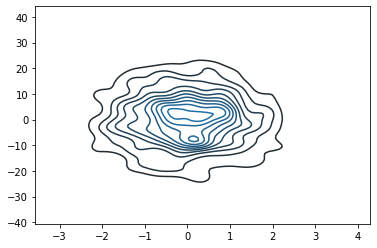

In [26]:
sns.kdeplot(dframe, bw='silverman')

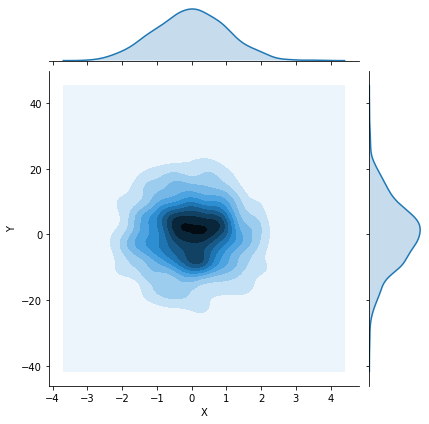

In [27]:
sns.jointplot('X', 'Y', dframe, kind='kde')